<a href="https://colab.research.google.com/github/ZhengYang-00/pytorch-cifar100/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
from sklearn import neighbors
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from skimage import io
import matplotlib.pyplot as plt
import os
import time

def readPictures(directory):
    imgs=[]
    for filename in os.listdir(directory):
        img = io.imread(directory+filename,as_gray=True)
        imgs.append(img)
    imgs = np.array(imgs).reshape(len(imgs),-1)
    return imgs

In [4]:
k = 2
r=[3,6]
for i in range(k):
  data = readPictures("/content/drive/MyDrive/Pictures/"+str(r[i])+"/")
  print(r[i])
  label = i*np.ones(len(data))
  x0_train,x0_test,y0_train,y0_test = model_selection.train_test_split(data,label,test_size=0.25)
  if i==0:
    X_train=x0_train
    X_test=x0_test
    Y_train=y0_train
    Y_test=y0_test
  else:
    X_train=np.concatenate((X_train,x0_train))
    X_test=np.concatenate((X_test,x0_test))
    Y_train=np.concatenate((Y_train,y0_train))
    Y_test=np.concatenate((Y_test,y0_test))

print(X_train.shape)

3
6
(457, 2304)


In [5]:
X_train = np.array(X_train).reshape(-1,48*48)
Y_train = np.array(Y_train).reshape(-1)
X_test = np.array(X_test).reshape(-1,48*48)
Y_test = np.array(Y_test).reshape(-1)
print(X_train.shape,Y_test.shape)

(457, 2304) (153,)


In [10]:
knn=neighbors.KNeighborsClassifier(n_neighbors=5,metric='minkowski')
t_begin = time.time()
knn.fit(X_train,Y_train)
print("training time cost=",time.time()-t_begin,"s")

##预测模型
t_begin = time.time()
Y_pred = knn.predict(X_test)
print("testing time cost=",time.time()-t_begin,"s")
Y_prob = knn.predict_proba(X_test)


##对模型进行评估
acc = metrics.accuracy_score(Y_test,Y_pred)
M = metrics.confusion_matrix(Y_test,Y_pred)    

print("Accuracy="+str(acc))
print(M.T)


training time cost= 0.053498268127441406 s
testing time cost= 0.3315255641937256 s
Accuracy=0.9019607843137255
[[68  5]
 [10 70]]


Accuracy=0.9020	F1 score=0.9032	AUC=0.9026


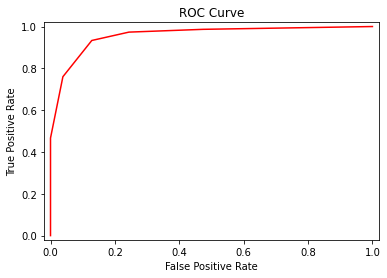

[[68  5]
 [10 70]]
TPR=0.8718	TNR=0.9333	FPR=0.0667	FDR=0.0685	


In [11]:
f1score = metrics.f1_score(Y_test,Y_pred)
FPR, TPR, _ = metrics.roc_curve(Y_test,Y_prob[:,1])
AUC = metrics.roc_auc_score(Y_test,Y_pred)
print("Accuracy=%.4f\tF1 score=%.4f\tAUC=%.4f" % (acc,f1score,AUC))

plt.figure()
plt.xlim([-0.02,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot(FPR, TPR, 'r')
plt.show()

TP = M[0,0]
FP = M[1,0]
FN = M[0,1]
TN = M[1,1]
TPR = TP / (TP+FN)
TNR = TN / (TN+FP)
FPR = FP / (FP+TN)
FDR = FP / (FP+TP)
print(M.T)
print("TPR=%.4f\tTNR=%.4f\tFPR=%.4f\tFDR=%.4f\t" % (TPR,TNR,FPR,FDR))

In [12]:
k = 5
r=[0,3,4,7,9]
for i in range(k):
  data = readPictures("/content/drive/MyDrive/Pictures/"+str(r[i])+"/")
  print(r[i])
  label = i*np.ones(len(data))
  x0_train,x0_test,y0_train,y0_test = model_selection.train_test_split(data,label,test_size=0.25)
  if i==0:
    X_train=x0_train
    X_test=x0_test
    Y_train=y0_train
    Y_test=y0_test
  else:
    X_train=np.concatenate((X_train,x0_train))
    X_test=np.concatenate((X_test,x0_test))
    Y_train=np.concatenate((Y_train,y0_train))
    Y_test=np.concatenate((Y_test,y0_test))

print(np.array(X_train).shape)

0
3
4
7
9
(1132, 2304)


In [13]:
X_train = np.array(X_train).reshape(-1,48*48)
Y_train = np.array(Y_train).reshape(-1)
X_test = np.array(X_test).reshape(-1,48*48)
Y_test = np.array(Y_test).reshape(-1)
print(X_train.shape,Y_test.shape)

(1132, 2304) (378,)


In [22]:
knn=neighbors.KNeighborsClassifier(n_neighbors=5,metric='cosine')
t_begin = time.time()
knn.fit(X_train,Y_train)
print("training time cost=",time.time()-t_begin,"s")

##预测模型
t_begin = time.time()
Y_pred = knn.predict(X_test)
print("testing time cost=",time.time()-t_begin,"s")
Y_prob = knn.predict_proba(X_test)


##对模型进行评估
acc = metrics.accuracy_score(Y_test,Y_pred)
M = metrics.confusion_matrix(Y_test,Y_pred)    

print("Accuracy="+str(acc))
print(M.T)

training time cost= 0.007756471633911133 s
testing time cost= 0.13213419914245605 s
Accuracy=0.7486772486772487
[[70  1  8 16 11]
 [ 0 58  8  3  2]
 [ 0 14 54  2  0]
 [ 2  3  4 45  6]
 [ 3  2  1  9 56]]


In [23]:
k = 10
for i in range(k):
  data = readPictures("/content/drive/MyDrive/Pictures/"+str(i)+"/")
  print(i)
  label = i*np.ones(len(data))
  x0_train,x0_test,y0_train,y0_test = model_selection.train_test_split(data,label,test_size=0.25)
  if i==0:
    X_train=x0_train
    X_test=x0_test
    Y_train=y0_train
    Y_test=y0_test
  else:
    X_train=np.concatenate((X_train,x0_train))
    X_test=np.concatenate((X_test,x0_test))
    Y_train=np.concatenate((Y_train,y0_train))
    Y_test=np.concatenate((Y_test,y0_test))

print(np.array(X_train).shape)

0
1
2
3
4
5
6
7
8
9
(2257, 2304)


In [24]:
X_train = np.array(X_train).reshape(-1,48*48)
Y_train = np.array(Y_train).reshape(-1)
X_test = np.array(X_test).reshape(-1,48*48)
Y_test = np.array(Y_test).reshape(-1)
print(X_train.shape,Y_test.shape)

(2257, 2304) (753,)


In [27]:
knn=neighbors.KNeighborsClassifier(n_neighbors=10)
t_begin = time.time()
knn.fit(X_train,Y_train)
print("training time cost=",time.time()-t_begin,"s")

##预测模型
t_begin = time.time()
Y_pred = knn.predict(X_test)
print("testing time cost=",time.time()-t_begin,"s")
Y_prob = knn.predict_proba(X_test)


##对模型进行评估
acc = metrics.accuracy_score(Y_test,Y_pred)
M = metrics.confusion_matrix(Y_test,Y_pred)    

print("Accuracy="+str(acc))
print(M.T)

training time cost= 0.5331211090087891 s
testing time cost= 10.115207433700562 s
Accuracy=0.5537848605577689
[[67  7  7  4  6  6  5  7  8  7]
 [ 3 62 14  5 22  2  3  8  9  6]
 [ 0  1 22  6  3  1  6  3  2  6]
 [ 0  1  7 49  3  1  0  1  0  2]
 [ 0  3 10  4 36  1  1  0  0  2]
 [ 0  0  1  1  0 43  1  0 12  1]
 [ 1  0  4  0  0  3 39  6  4  2]
 [ 1  0  6  7  3  4 10 38  8  5]
 [ 0  0  2  2  0  6  0  0 18  1]
 [ 3  1  2  0  2  8 10 12 14 43]]
